In [43]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
print("All libraries have been imported")

All libraries have been imported


In [51]:
df = pd.read_csv('/content/NSE50 - Copy.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,31-Dec-19,12247.10,12247.10,12151.80,12168.45,3046.750000,0.0
1,30-Dec-19,12274.90,12286.45,12213.80,12255.85,3121.449951,0.0
2,27-Dec-19,12172.90,12258.45,12157.90,12245.80,3112.800049,0.0
3,26-Dec-19,12211.85,12221.55,12118.85,12126.55,2920.399902,0.0
4,24-Dec-19,12269.25,12283.70,12202.10,12214.55,2873.000000,0.0
5,23-Dec-19,12235.45,12287.15,12213.25,12262.75,2773.100098,0.0
6,20-Dec-19,12266.45,12293.90,12252.75,12271.80,2744.949951,0.0
7,19-Dec-19,12223.40,12268.35,12191.15,12259.70,2835.300049,0.0
8,18-Dec-19,12197.00,12237.70,12163.45,12221.65,2736.699951,0.0
9,17-Dec-19,12082.45,12182.75,12070.35,12165.00,2828.449951,0.0


In [52]:
df.dropna(inplace=True)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,31-Dec-19,12247.10,12247.10,12151.80,12168.45,3046.750000,0.0
1,30-Dec-19,12274.90,12286.45,12213.80,12255.85,3121.449951,0.0
2,27-Dec-19,12172.90,12258.45,12157.90,12245.80,3112.800049,0.0
3,26-Dec-19,12211.85,12221.55,12118.85,12126.55,2920.399902,0.0
4,24-Dec-19,12269.25,12283.70,12202.10,12214.55,2873.000000,0.0
5,23-Dec-19,12235.45,12287.15,12213.25,12262.75,2773.100098,0.0
6,20-Dec-19,12266.45,12293.90,12252.75,12271.80,2744.949951,0.0
7,19-Dec-19,12223.40,12268.35,12191.15,12259.70,2835.300049,0.0
8,18-Dec-19,12197.00,12237.70,12163.45,12221.65,2736.699951,0.0
9,17-Dec-19,12082.45,12182.75,12070.35,12165.00,2828.449951,0.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2683 entries, 0 to 2682
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2683 non-null   object 
 1   Open       2683 non-null   float64
 2   High       2683 non-null   float64
 3   Low        2683 non-null   float64
 4   Close      2683 non-null   float64
 5   Adj Close  2683 non-null   float64
 6   Volume     2683 non-null   float64
dtypes: float64(6), object(1)
memory usage: 232.2+ KB


In [54]:
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)


In [55]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2683 entries, 0 to 2682
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2683 non-null   object 
 1   Adj Close  2683 non-null   float64
dtypes: float64(1), object(1)
memory usage: 127.4+ KB


In [56]:
df['Date'] = pd.to_datetime(df['Date'])
df_chg= df.set_index(['Date'], drop=True)
df_chg.head()

<ipython-input-56-8dcb1eda1bc7>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Adj Close
Date,
2019-12-31,3046.750000
2019-12-30,3121.449951
2019-12-27,3112.800049
2019-12-26,2920.399902
2019-12-24,2873.000000


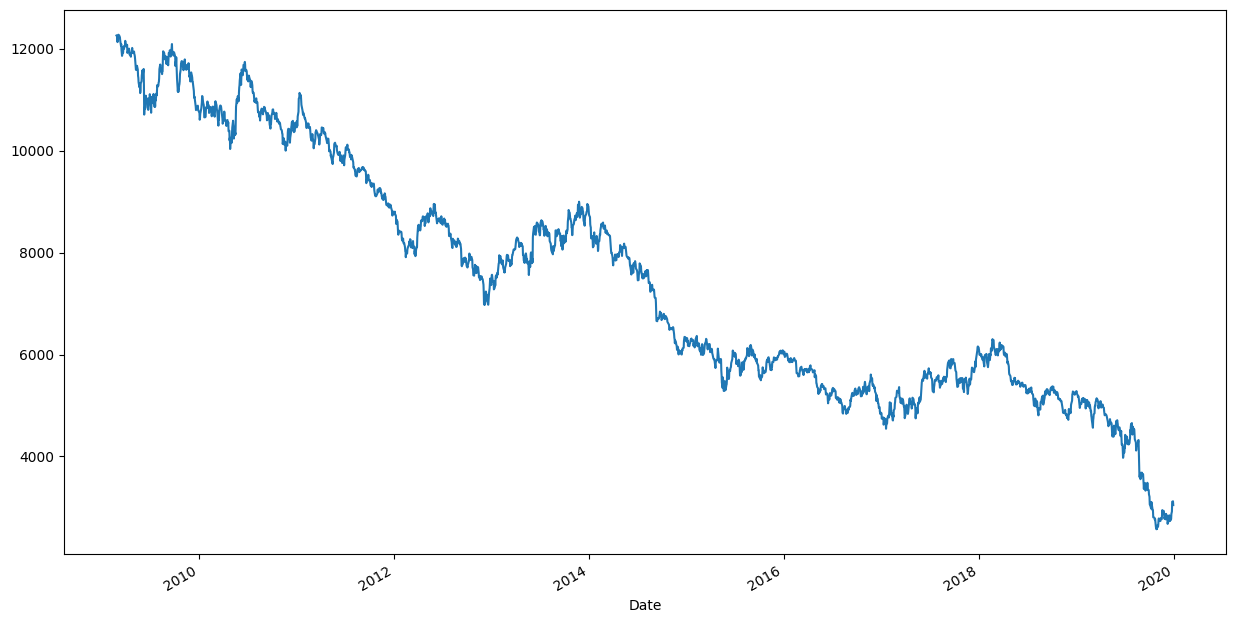

In [57]:
plt.figure(figsize=(15,8))
df_chg['Adj Close'].plot();

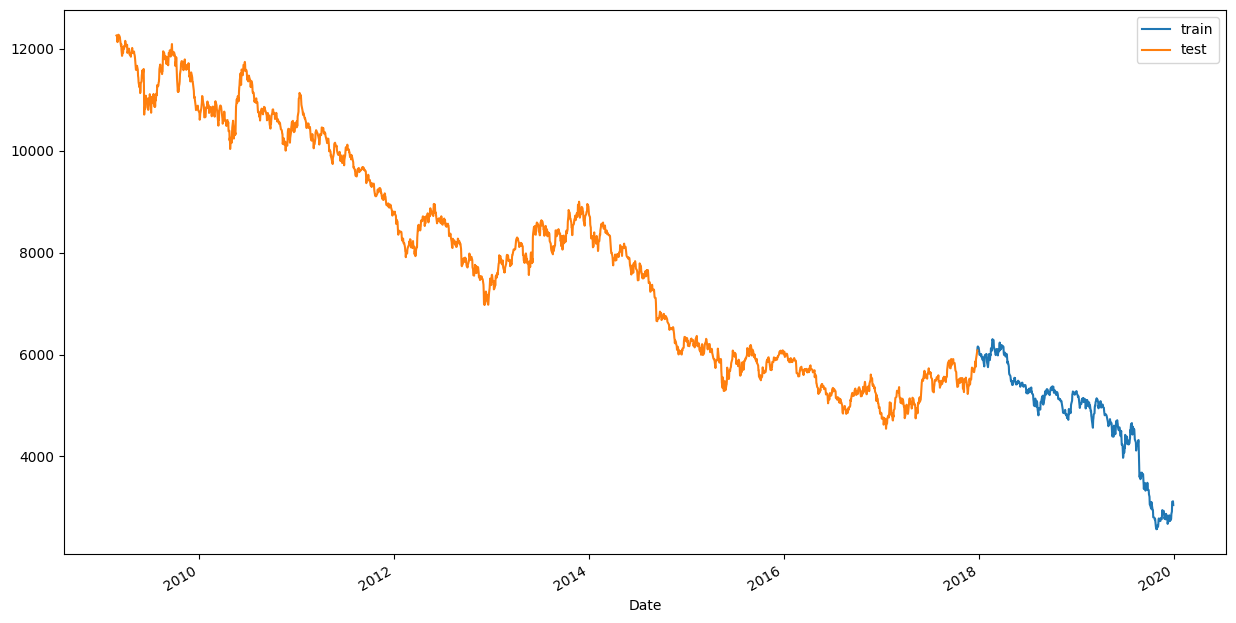

In [58]:
split_date = pd.Timestamp('2017-12-27')
df1 = df_chg['Adj Close']
train = df1.loc[:split_date]
test = df1.loc[split_date:]
plt.figure(figsize=(15,8))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [59]:
print("We have", len(train), "train values")
print("We have", len(test), "test values")


We have 494 train values
We have 2190 test values


In [60]:
train_processed = df_chg.iloc[:, 0:1].values
train_processed = train_processed[0:1996:1]
test_processed = df_chg.iloc[:, 0:1].values
test_processed = test_processed[1995:2495:1]

In [61]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train_processed)
test_sc = scaler.transform(test_processed)

In [62]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

In [63]:
X_test = test_sc[:-1]
y_test = test_sc[1:]

In [64]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1884
Epoch 2/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0194
Epoch 3/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0054
Epoch 4/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0034
Epoch 5/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0025
Epoch 6/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0022
Epoch 7/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0019
Epoch 8/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0017
Epoch 9/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0014
Epoch 10/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0013
Epoch 11/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0011
Epoch 12/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9.5531e-04
Epoch 13/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 9.2993e-04
Epoch 14/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 9.4328e-04
Epo

In [65]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
The R2 score on the Train set is:	0.977
The R2 score on the Test set is:	0.666


In [67]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)


for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train['X_1']
y_train = y_train['Y']
X_test = X_test['X_1']
y_test = y_test['Y']

X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

ValueError: Shape of passed values is (1996, 1), indices imply (494, 1)

In [70]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y']) # remove index=train.index
test_sc_df = pd.DataFrame(test_sc, columns=['Y']) # remove index=test.index


for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train # complete the variable name

array([[-0.85253224],
       [-0.82927246],
       [-0.83196583],
       ...,
       [ 0.96926712],
       [ 0.98978692],
       [ 0.98463371]])

In [71]:
lstm_model = Sequential()
lstm_model.add(LSTM(7, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

NameError: name 'X_train_lmse' is not defined

In [72]:
lstm_model = Sequential()
#Check to see if X_train was intended to be used instead.
lstm_model.add(LSTM(7, input_shape=(1, X_train.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1995/1995 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0893
Epoch 2/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0255
Epoch 3/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0072
Epoch 4/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0038
Epoch 5/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0030
Epoch 6/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0024
Epoch 7/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0020
Epoch 8/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0017
Epoch 9/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0015
Epoch 10/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0013
Epoch 11/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0011
Epoch 12/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9.9766e-04
Epoch 13/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 8.7334e-04
Epoch 14/100
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 7.8915e-04
Epoch 15/100
19

In [74]:
y_pred_test_lstm = lstm_model.predict(X_test) # use X_test instead of X_test_lmse
y_train_pred_lstm = lstm_model.predict(X_train) # use X_train instead of X_train_lmse
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
The R2 score on the Train set is:	0.985
The R2 score on the Test set is:	0.419


In [76]:
# Ensure your test data is properly loaded for both models
X_test_nn = X_test  # Input for NN model (if different, modify accordingly)
X_test_lstm = X_test  # Input for LSTM model (if reshaped, modify accordingly)

# Evaluate NN model
nn_test_mse = nn_model.evaluate(X_test_nn, y_test, batch_size=1)

# Evaluate LSTM model
lstm_test_mse = lstm_model.evaluate(X_test_lstm, y_test, batch_size=1)

# Print results
print('NN MSE: %f' % nn_test_mse)
print('LSTM MSE: %f' % lstm_test_mse)


499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0061  
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0103
NN MSE: 0.012102
LSTM MSE: 0.021055


In [77]:
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # Adjust dimensions as needed


In [81]:
nn_y_pred_test = nn_model.predict(X_test)
#Use X_test_lstm if this variable contains the reshaped X_test for the lstm model.
#Otherwise, use X_test if no reshaping is necessary
lstm_y_pred_test = lstm_model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


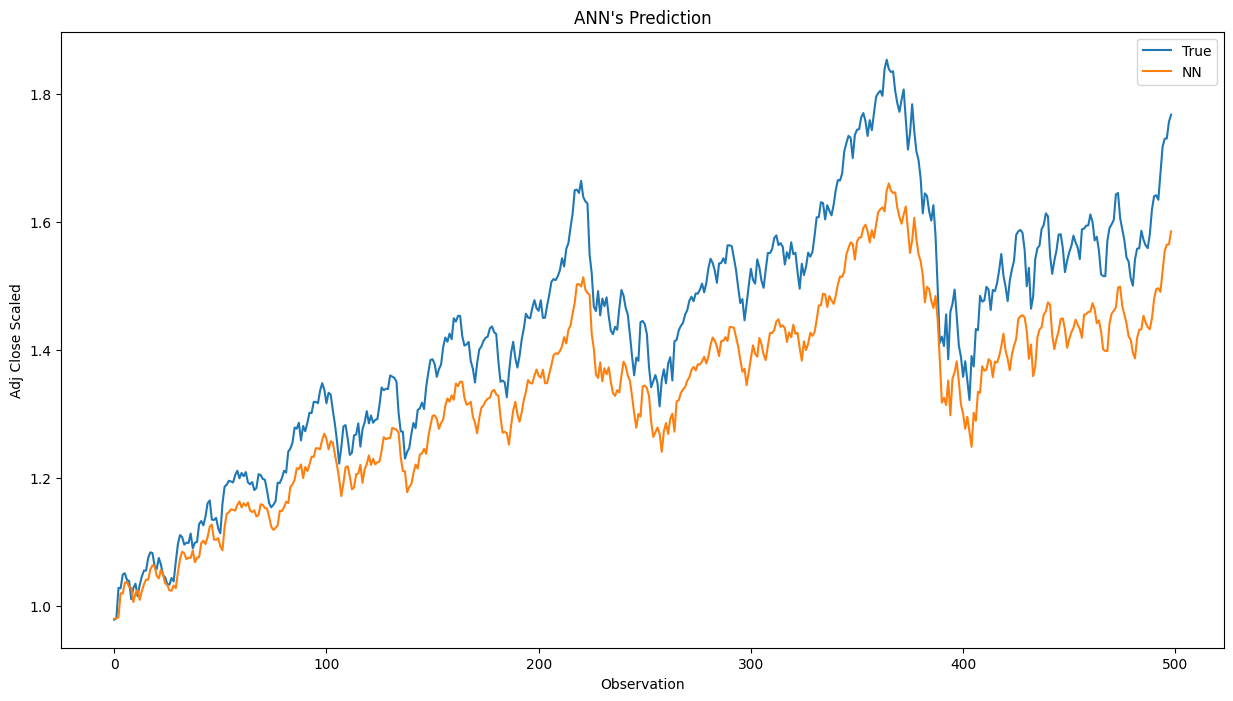

In [82]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

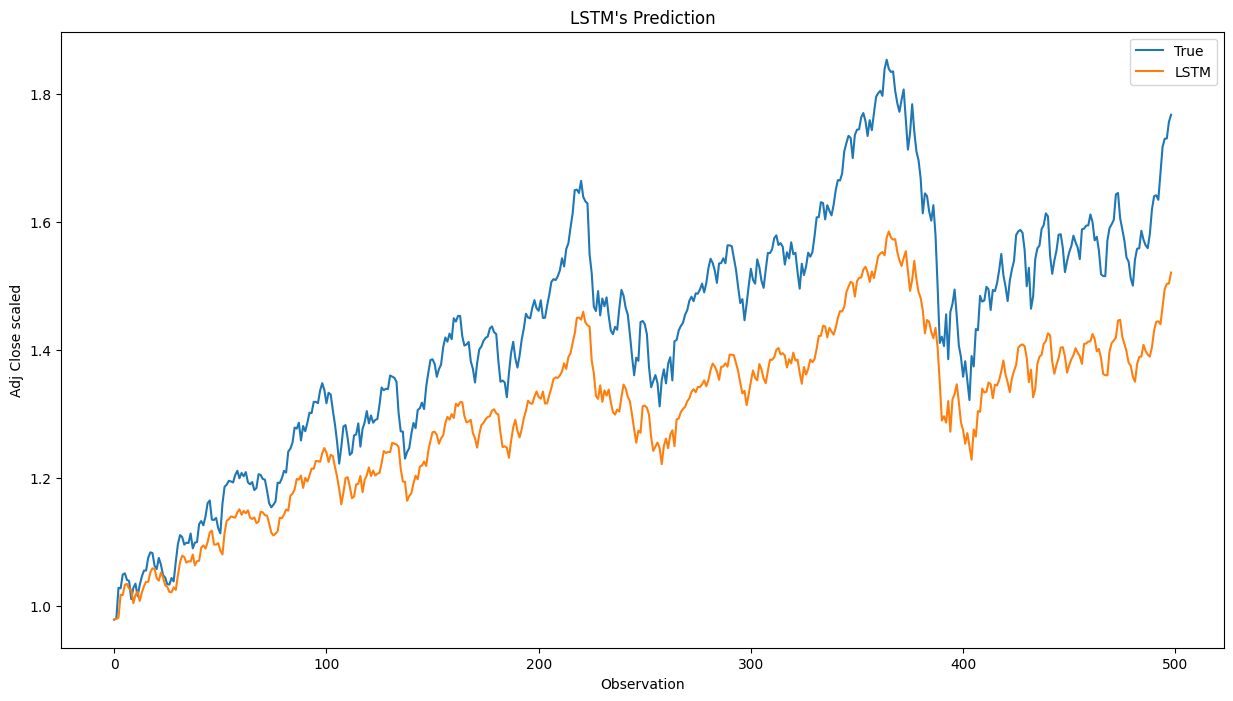

In [84]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(lstm_y_pred_test, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();